## Step 1: Load and Inspect Data

In [1]:
import pandas as pd

# Load the dataset (replace with your CSV file path)
df = pd.read_csv("PlayerBattle.csv")

# Show first few rows
print(df.head())

# Basic info
print(df.info())

# Summary stats
print(df.describe())

   Id  Match_Id        Date        Match Venue Country       Venue Format  \
0   1         1  25-10-2025   AUS Vs IND     Australia      Sydney    ODI   
1   2         2  25-10-2025  AUSW Vs SAW         India      Indore   WODI   
2   3         3  27-10-2025    BAN Vs WI    Bangladesh  Chattogram   T20I   
3   4         4  28-10-2025    PAK Vs SA      Pakistan  Rawalpindi   T20I   
4   5         4  28-10-2025    PAK Vs SA      Pakistan  Rawalpindi   T20I   

              Tournment UserSelectedFirst  Bet Amount  Top Loss Run  \
0  Ind Tour of Aus 2025                No        15.0           150   
1    ICC World Cup 2025                No         5.0           150   
2   WI Tour of BAN 2025                No        30.0           100   
3   SA Tour of PAK 2025                No        25.0           100   
4   SA Tour of PAK 2025                No         5.0           100   

   Your Points  Computer Points  Bet Place Amount  Amount Received   \
0          307              216        

## Step 2: General Statistics

In [2]:
# Total matches
total_matches = len(df)

# Total Won and Lost
wins = df['Won/Lost'].value_counts().get('Won', 0)
losses = df['Won/Lost'].value_counts().get('Lost', 0)

# Win percentage
win_rate = (wins / total_matches) * 100

print(f"Total Matches: {total_matches}")
print(f"Wins: {wins}, Losses: {losses}, Win %: {win_rate:.2f}")

Total Matches: 31
Wins: 21, Losses: 10, Win %: 67.74


## Step 3: Profit and Returns Analysis

In [3]:
# Total Profit/Loss
total_profit = df['Profit/Loss'].sum()

# Average Return %
avg_return = df['Returns %'].mean()

print(f"Total Profit/Loss: ₹{total_profit}")
print(f"Average Return %: {avg_return:.2f}")

Total Profit/Loss: ₹7623.495999999999
Average Return %: 118.91


## Step 4: Per-Match Insights

In [4]:
# Sort by Returns %
top_returns = df.sort_values(by='Returns %', ascending=False).head(5)
print("Top 5 Matches by Returns %:")
print(top_returns[['Date', 'Match', 'Returns %', 'Profit/Loss']])

# Lowest performing matches
low_returns = df.sort_values(by='Returns %').head(5)
print("Lowest 5 Matches by Returns %:")
print(low_returns[['Date', 'Match', 'Returns %', 'Profit/Loss']])

Top 5 Matches by Returns %:
          Date       Match  Returns %  Profit/Loss
4   28-10-2025   PAK Vs SA      192.0       460.00
22  05-11-2025    NZ Vs WI      183.0      1644.23
11  31-10-2025   BAN Vs WI      176.0       760.00
12  31-10-2025   BAN Vs WI      170.0       490.00
8   31-10-2025  AUS Vs IND      168.0       340.00
Lowest 5 Matches by Returns %:
          Date       Match  Returns %  Profit/Loss
29  15-11-2025  SSW Vs STW       22.0       -390.0
28  08-11-2025    NZ Vs WI       43.0       -826.5
26  08-11-2025    NZ Vs WI       43.0       -570.0
13  31-10-2025   PAK Vs SA       50.0       -500.0
14  31-10-2025   PAK Vs SA       50.0       -350.0


## Step 5: Aggregation by Country, Format, or Tournament

In [5]:
# Performance by Venue Country
country_perf = df.groupby('Venue Country')['Profit/Loss'].sum().sort_values(ascending=False)
print(country_perf)

# Performance by Format
format_perf = df.groupby('Format')['Profit/Loss'].sum()
print(format_perf)

Venue Country
India          2420.000
New Zealand    1555.436
Bangladesh     1430.000
Australia      1234.060
Zimbabwe        824.000
Pakistan        160.000
Name: Profit/Loss, dtype: float64
Format
ODI     1532.706
T20I    3950.790
WODI    2420.000
WT20    -280.000
Name: Profit/Loss, dtype: float64


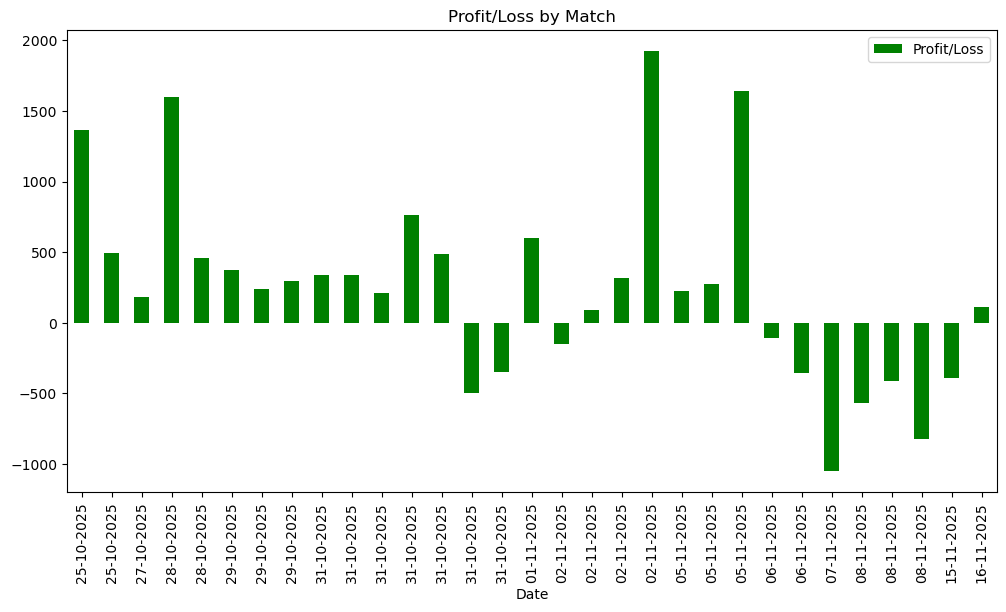

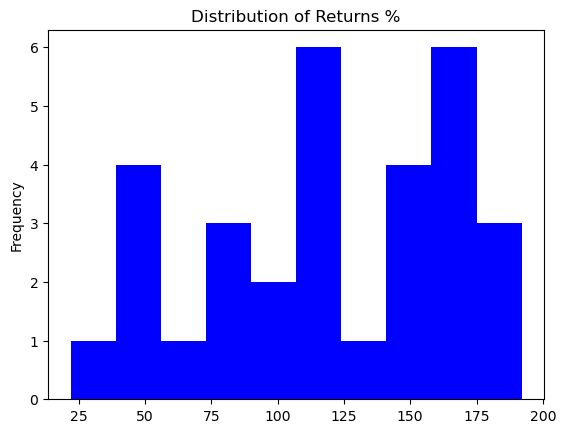

In [6]:
import matplotlib.pyplot as plt

# Profit/Loss trend
df.plot(x='Date', y='Profit/Loss', kind='bar', figsize=(12,6), color='green')
plt.title('Profit/Loss by Match')
plt.xticks(rotation=90)
plt.show()

# Returns % Distribution
df['Returns %'].plot(kind='hist', bins=10, title='Distribution of Returns %', color='blue')
plt.show()

## 📈 Detailed Line Chart of Betting Performance Over Time

C:\Users\pavan\AppData\Local\Temp\ipykernel_1748\2575744020.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pavan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


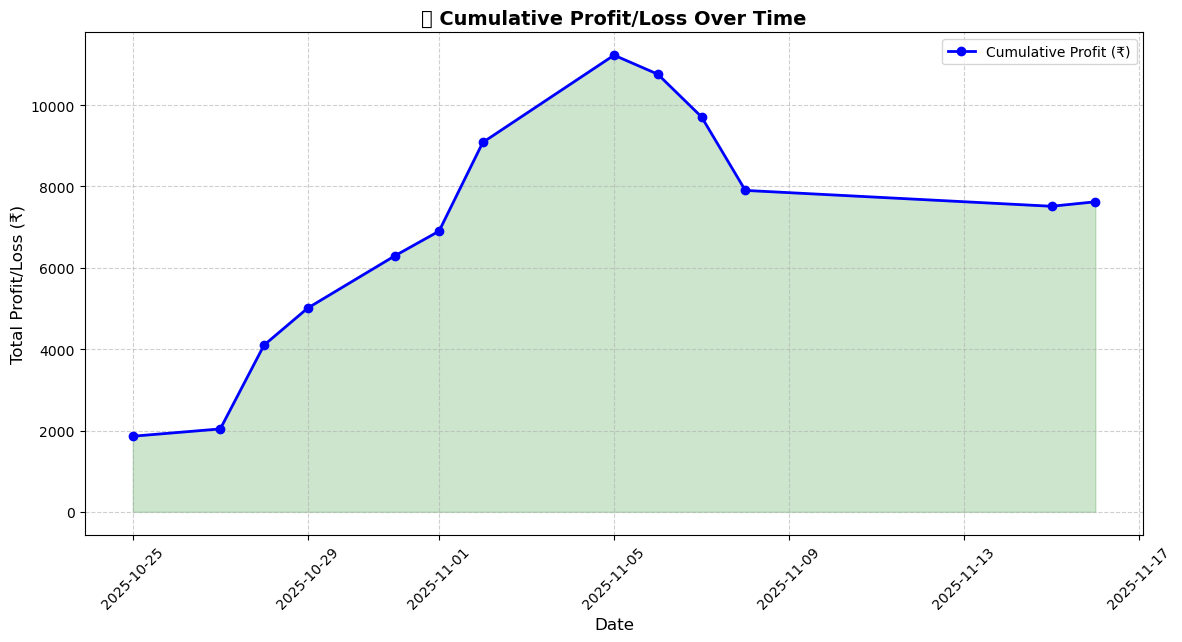

In [7]:

df.columns = df.columns.str.strip()  # clean column names
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Sort by date
df = df.sort_values(by='Date')

# ============================
# 2️⃣ Group and Calculate Cumulative Profit
# ============================

# Step 1: Sum profit/loss per date
daily_profit = df.groupby('Date', as_index=False)['Profit/Loss'].sum()

# Step 2: Calculate cumulative total
daily_profit['Cumulative_Profit'] = daily_profit['Profit/Loss'].cumsum()

# ============================
# 3️⃣ Plot Cumulative Profit Chart
# ============================

plt.figure(figsize=(12,6))
plt.plot(daily_profit['Date'], daily_profit['Cumulative_Profit'], marker='o', color='blue', linewidth=2, label='Cumulative Profit (₹)')

# Highlight profit growth vs dips
plt.fill_between(
    daily_profit['Date'],
    daily_profit['Cumulative_Profit'],
    color='green',
    alpha=0.2
)

# ============================
# 4️⃣ Formatting
# ============================

plt.title('📊 Cumulative Profit/Loss Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Profit/Loss (₹)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [8]:
df.columns = df.columns.str.strip()

# Calculate profit metrics
total_profit = df['Profit/Loss'].sum()
total_matches = len(df)
avg_profit_per_match = total_profit / total_matches
expected_profit_100_matches = avg_profit_per_match * 100

print(f"📊 Total matches played: {total_matches}")
print(f"💰 Total Profit so far: ₹{total_profit:.2f}")
print(f"⚖️ Average Profit per Match: ₹{avg_profit_per_match:.2f}")
print(f"🚀 Expected Profit after 100 matches (at same pace): ₹{expected_profit_100_matches:.2f}")


📊 Total matches played: 31
💰 Total Profit so far: ₹7623.50
⚖️ Average Profit per Match: ₹245.92
🚀 Expected Profit after 100 matches (at same pace): ₹24591.92
